<a href="https://imgbb.com/"><img src="https://i.ibb.co/QrxXt4w/cute-smiling-animals-2.jpg" alt="cute-smiling-animals-2" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'></a><br />

# World Happiness Report 2019

## Pre-lecture readings

### Report: 
Read selectively
https://worldhappiness.report/ed/2019/#read

### News:
- [INTERNATIONAL DAY OF HAPPINESS: AMERICA FALLS AGAIN IN LIST OF WORLD'S HAPPIEST COUNTRIES!](https://www.newsweek.com/world-happiness-report-un-us-technology-smartphones-1369165)
- [United Nations report says Americans are increasingly less happy!](https://www.nydailynews.com/news/national/ny-americans-less-happy-20190320-fnk3az5z5vf7vlo6vcgdr7uute-story.html)
- [Economic growth does not guarantee rising happiness!](https://www.economist.com/graphic-detail/2019/03/21/economic-growth-does-not-guarantee-rising-happiness)
- [Finland tops UN’s list of world’s happiest countries again!](https://nypost.com/2019/03/21/finland-tops-uns-list-of-worlds-happiest-countries-again/)
- [Why people in Finland are so much happier than Americans!](https://www.aol.com/article/news/2019/03/20/why-people-in-finland-are-so-much-happier-than-americans/23696353/)

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The report is produced by the United Nations Sustainable Development Solutions Network in partnership with the Ernesto Illy Foundation. 

This year’s Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py

In [2]:
df_2019 = pd.read_excel('data/WHR_2019.xlsx')

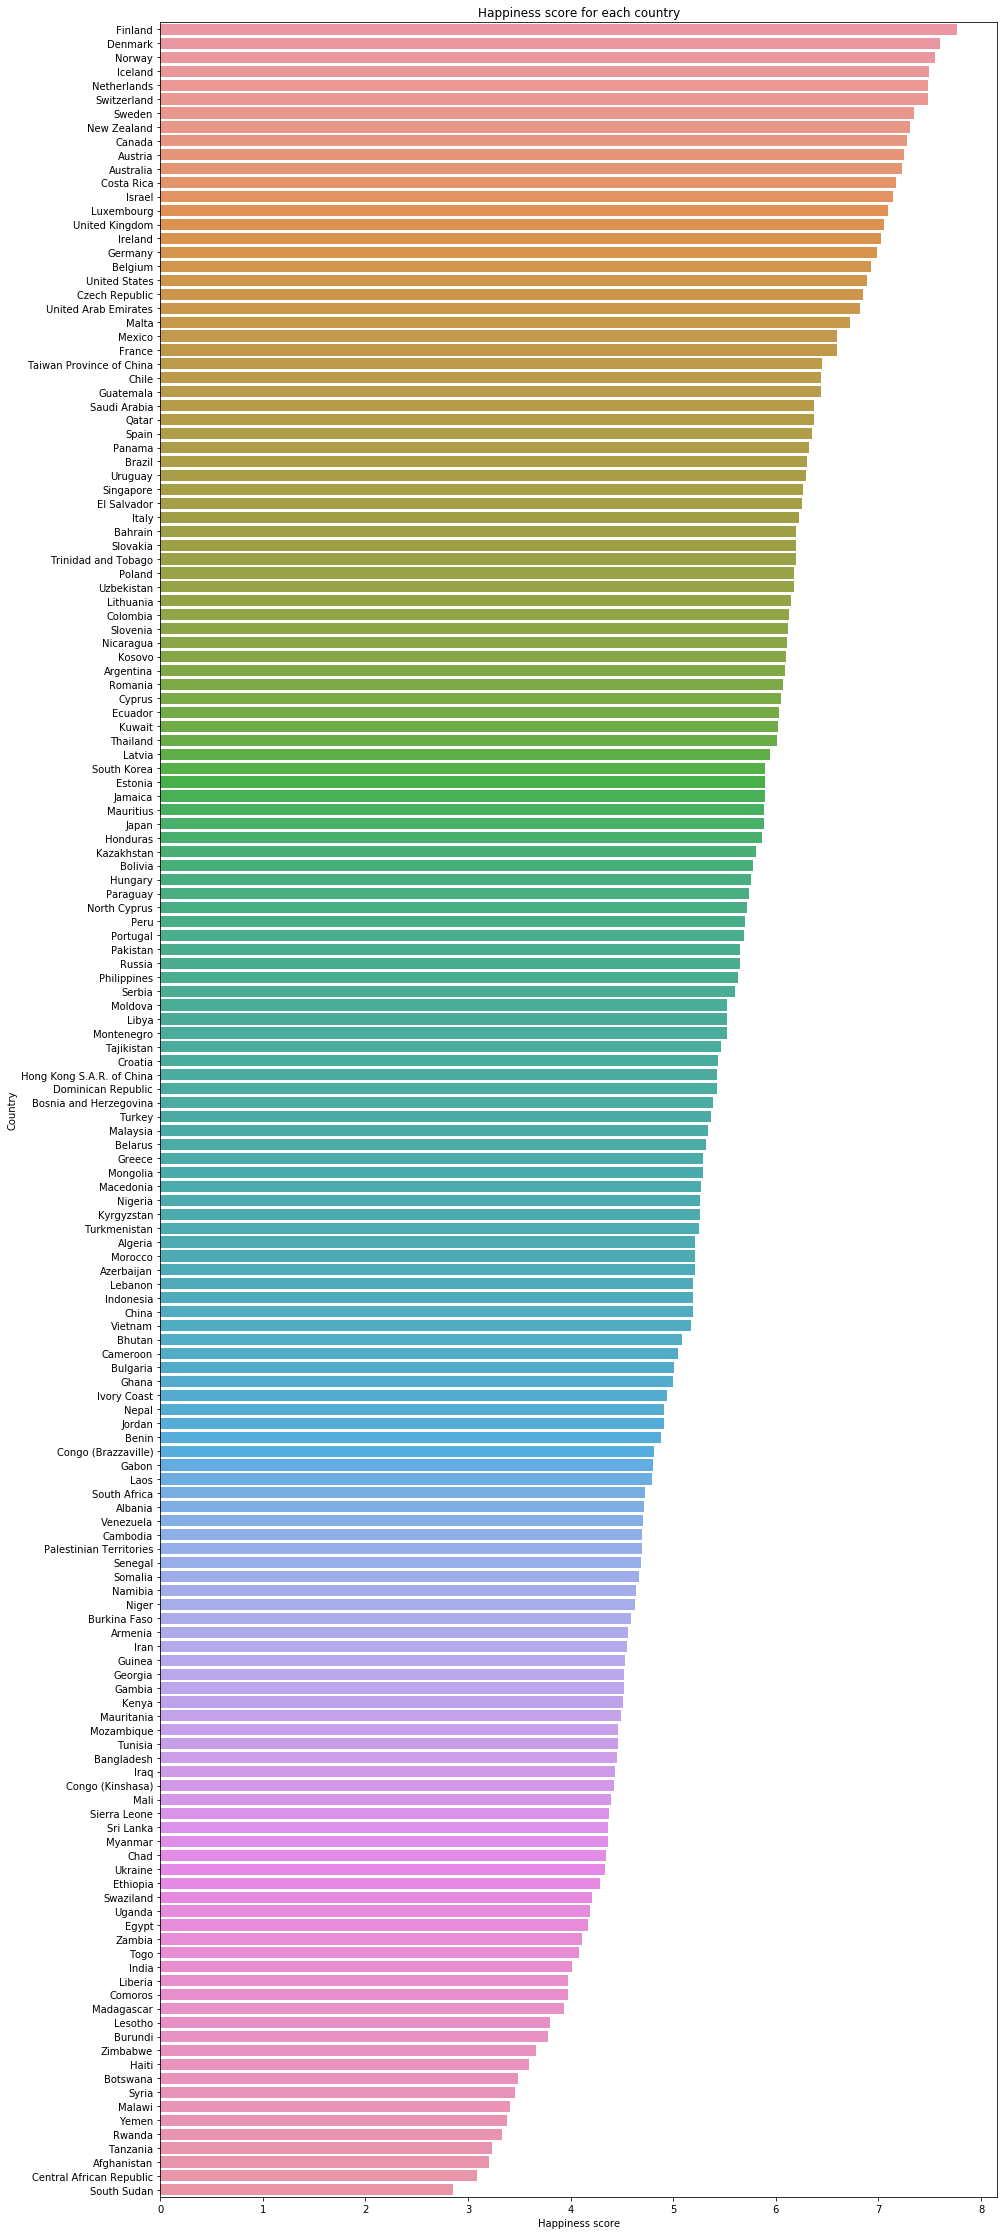

In [3]:
plt.figure(figsize = (15, 40))
sns.barplot(x = 'Happiness score', y = 'Country', data = df_2019)
plt.title('Happiness score for each country');

In [4]:
# This code block should be hid from the students
df_iso = pd.read_csv('data/relig_iso.csv')
df_iso = df_iso[['iso', 'country']]

new_names = {'Bosnia Herzegovina': 'Bosnia and Herzegovina',
             'Republic of Congo': 'Congo (Brazzaville)',
             'Democratic Republic of the Congo': 'Congo (Kinshasa)',
             'Finland ': 'Finland',
             'Kyrgyz Republic': 'Kyrgyzstan',
             'Macedonia (FYR)': 'Macedonia',
             'Sudan': 'South Sudan',
             'Taiwan': 'Taiwan Province of China',
             'United States of America': 'United States'}
df_iso.replace({'country': new_names}, inplace=True)

df_viz = pd.merge(df_iso, df_2019, left_on = 'country', right_on = 'Country')[['iso', 'country', 'Happiness score']]
data = [dict(type='choropleth', locations=df_viz['iso'], z=df_viz['Happiness score'],
             text=df_viz['country'],
             colorscale=[[0, "rgb(0, 77, 135)"], [0.25, "rgb(84, 195, 232)"],
                         [0.5, "rgb(255,255,191)"], [0.75, "rgb(253,174,97)"],
                         [1, "rgb(215,25,28)"]],
             autocolorscale=False, reversescale=True,
             marker=dict(line=dict(color='rgb(180, 180, 180)', width=0.5)),
             colorbar=dict(autotick=False, title='Happiness ranking', thickness=15, len=0.6, 
                           tickfont=dict(size=14), titlefont=dict(size=14)),)]
layout = dict(title='Happiness by Country', font=dict(size=18),
              geo=dict(showframe=False, showcoastlines=False,
                       projection=dict(type='Mercator')))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

### Just by reading the report and looking at their results, what questions do you want to ask?

### Question: How are the Happiness scores computed?

The Happiness rankings from World Happiness Report 2019 use data that come from the Gallup World Poll. The rankings are based on answers to the main life evaluation question:
*“Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”*

The World Happiness Report 2019 takes the average of *Life Ladder* rankings between 2016 and 2018.

## The agenda of today is as follows:
1. Explore the Gallup World Poll data and try to replicate some results from the World Happiness Report 2019. 
2. Explore the relationships between different factors and Happiness scores.
3. Predict Happiness scores using K-Nearest-Neighbor.

# 1. Explore the Gallup World Poll data

Data Coverage: 2008-2018.

Columns:
- **Country name**: Name of the country
- **Year**: Surveyed year
- **Life Ladder**: National average of Happiness rankings obtained by answers to the above question 
- **Log GDP per capita**: The natural log of purchasing power parity (PPP) value of all final goods and services produced within a country in a given year, divided by the average population for the same year.
- **Social support**: Answers to the question: "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”. The responses are binary(either 0 or 1).
- **Healthy life expectancy at birth**: Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository. The data at the source are available for the years 2000, 2005, 2010, 2015 and 2016. To match this report’s sample period (2005-2018), interpolation and extrapolation are used.
- **Freedom to make life choices**: Answers to the question: "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"
- **Perceptions of corruption**: The national average of the survey responses to two questions: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” 
- **Positive affect**: The average of measures happiness, laugh and enjoyment.
- **Negative affect**: The average of measures worry, sadness and anger.
- **Confidence in national government**: Answers to the question: "Do you have confidence in natinoal government?"
- **Democratic Quality**: Answers to the question: "How satisfied are you with the way democracy works in this country? Very satisfied, somewhat satisfied, neither satisfied nor dissatisfied, somewhat dissatisfied, or very dissatisfied.

Here's a list of Gallup's World Poll Questions if you are interested: https://media.gallup.com/dataviz/www/WP_Questions_WHITE.pdf

In [5]:
df = pd.read_excel('data/2008-2018 GWP.xlsx')
df.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  \
0                         50.799999                      0.718114   
1                         51.200001                      0.678896   
2                         51.599998                      0.600127   
3                         51.919998                      0.495901   
4                         52.240002                      0.530935   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  
0                           0.612072           -1.929690  
1                           0.611545           -2.044093  
2                           0.299357           -1.991810  
3                           0.307386           -1.919018  
4                           0.435440           -1.842996

#### Reproduce the Happiness scores from World Happiness Report 2019 by taking the average of "Life Ladder" between 2016 and 2018: 

Note that 'Syria' doesn't have data after 2015:

In [6]:
df[df['Country name'] == 'Syria']

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
1453        Syria  2008     5.323332            8.556605        0.712370   
1454        Syria  2009     4.978971            8.559392        0.842402   
1455        Syria  2010     4.464708            8.636470        0.934232   
1456        Syria  2011     4.037889            8.636973        0.575722   
1457        Syria  2012     3.164491            8.474884        0.588395   
1458        Syria  2013     2.687553            8.307246        0.585450   
1459        Syria  2015     3.461913                 NaN        0.463913   

      Healthy life expectancy at birth  Freedom to make life choices  \
1453                         63.900002                      0.660753   
1454                         64.000000                      0.748259   
1455                         64.099998                      0.647048   
1456                         62.320000                      0.530433   
1457                         60.540001                      0.466771   
1458                         58.759998                      0.454883   
1459                         55.200001                      0.448271   

      Perceptions of corruption  Positive affect  Negative affect  \
1453                   0.680204         0.609097         0.338427   
1454                   0.687760         0.574330         0.292455   
1455                   0.743094         0.557652         0.224644   
1456                   0.740586         0.598737         0.495505   
1457                   0.672964         0.464439         0.704590   
1458                   0.663431         0.386987         0.622230   
1459                   0.685237         0.369440         0.642589   

      Confidence in national government  Democratic Quality  
1453                                NaN           -1.030372  
1454                                NaN           -1.099893  
1455                                NaN           -1.251231  
1456                                NaN           -1.909194  
1457                                NaN           -2.263247  
1458                                NaN           -2.258025  
1459                                NaN           -2.448228

To be consistent with the 2019 Report, we'll use Syria's 2015 data to fill in 2016-2018.

In [7]:
df_16_to_18 = df[df.Year.between(2016, 2018)]

In [8]:
# Group by country and take the mean
avg_16_to_18 = df_16_to_18.groupby('Country name').mean()[['Life Ladder']]

In [9]:
# Add in Syria
syria = df[(df['Country name'] == 'Syria') & (df['Year'] == 2015)][['Country name', 'Life Ladder']].set_index('Country name')
avg_16_to_18 = avg_16_to_18.append(syria)

In [10]:
# Add in Syria
avg_16_to_18.loc['Syria', 'Life Ladder'] = df[(df['Country name'] == 'Syria') & (df['Year'] == 2015)]['Life Ladder'].values[0]

In [11]:
# Sort the scores in decreasing order
avg_16_to_18 = avg_16_to_18.sort_values('Life Ladder', ascending = False)

In [12]:
avg_16_to_18

Life Ladder
Country name                         
Finland                      7.768734
Denmark                      7.600090
Norway                       7.539780
Iceland                      7.493124
Netherlands                  7.487647
...                               ...
Rwanda                       3.334137
Tanzania                     3.231626
Afghanistan                  3.192063
Central African Republic     3.084462
South Sudan                  2.852367

[154 rows x 1 columns]

#### Reproduce the changes in Happiness scores from 2005-2008 to 2016-2018

Let's first take a look at changes of some countries over the years:
(Ask the students which countries they wanna see)
(Can also look at Gapminder)

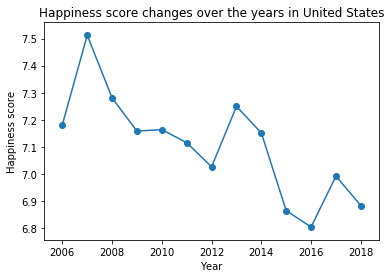

In [13]:
# Plot the changes for specific countries
country_to_plot = 'United States'
df_plot_change = df[df['Country name'] == country_to_plot]
plt.plot(df_plot_change.Year, df_plot_change['Life Ladder'])
plt.scatter(df_plot_change.Year, df_plot_change['Life Ladder'])
plt.xlabel('Year')
plt.ylabel('Happiness score')
plt.title('Happiness score changes over the years in ' + country_to_plot);

In [14]:
avg_05_to_08 = df[df.Year.between(2005, 2008)].groupby('Country name').mean()[['Life Ladder']].sort_values('Life Ladder', ascending = False)

In [15]:
# Compute the changes in Happiness scores(Life Ladder)
df_change = avg_05_to_08.merge(avg_16_to_18, left_index = True, right_index = True, suffixes = (' 2005-2008', ' 2016-2018'))
df_change['change'] = df_change['Life Ladder 2016-2018'] - df_change['Life Ladder 2005-2008']

In [16]:
# Sort the score changes
df_change = df_change.sort_values(by = ['change'], ascending = False)

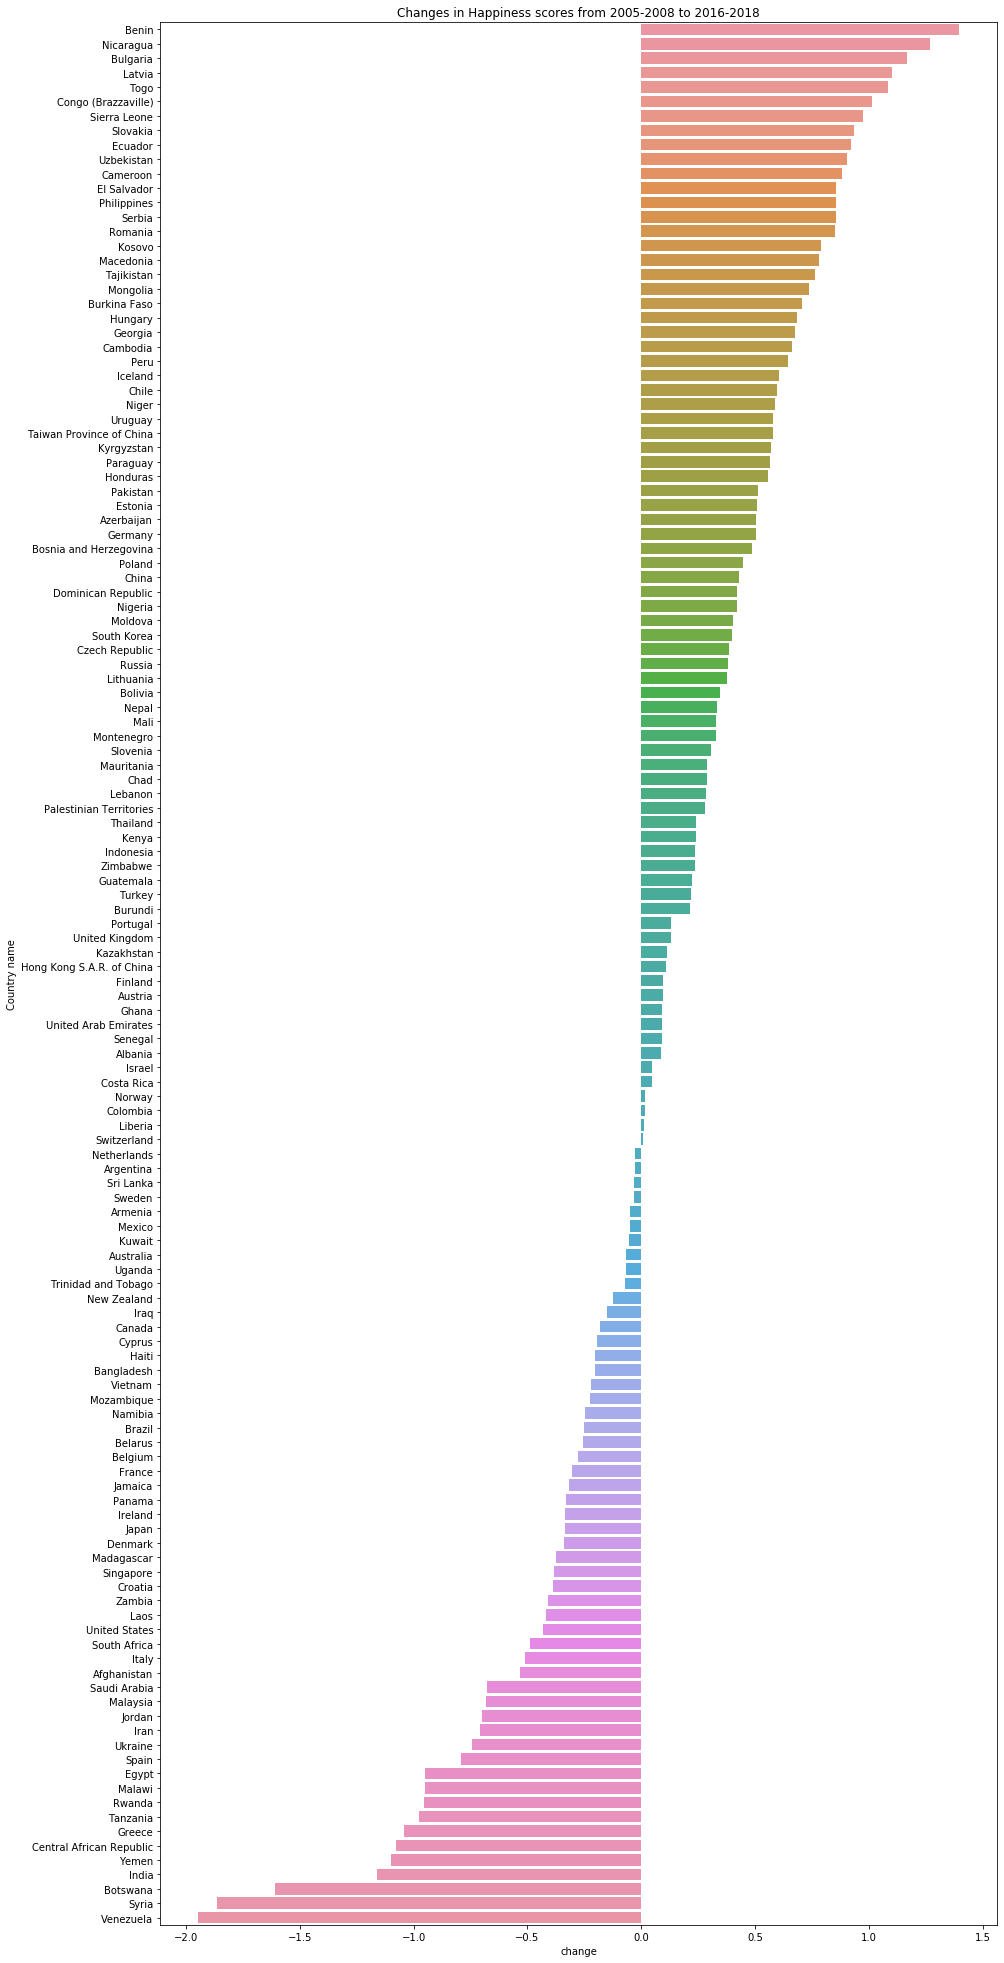

In [17]:
# Plot the changes
plt.figure(figsize = (15, 35))
sns.barplot(x = df_change.change, y = df_change.index);
plt.title('Changes in Happiness scores from 2005-2008 to 2016-2018');

#### Take a look at the 20 countries with the largest declines, what do you observe? How would you explain that?

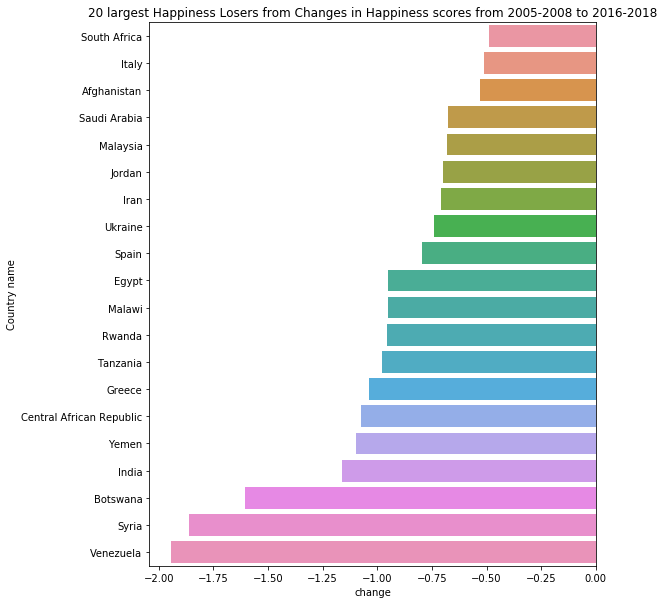

In [18]:
plt.figure(figsize = (8, 10))
sns.barplot(x = df_change.change[-20:], y = df_change.index[-20:])
plt.title('20 largest Happiness Losers from Changes in Happiness scores from 2005-2008 to 2016-2018');

- Economy
     - 2008 banking crisis: Greece, Spain, and Italy.
- Politics 
     - Wars: Syrian civil war

To be consistent with the 2019 Report, we'll only use the average between 2016 and 2018 data for the following analysis.

In [19]:
#Let's again groupby country names and take the mean, drop the Year column as we don't need it anymore
my_df = df_16_to_18.groupby('Country name').mean().drop(columns = ['Year'])
my_df.head()

Life Ladder  Log GDP per capita  Social support  \
Country name                                                    
Afghanistan      3.192063            7.496460        0.519156   
Albania          4.718351            9.375359        0.653234   
Algeria          5.210951            9.546586        0.784664   
Argentina        6.086449            9.829590        0.896477   
Armenia          4.558552            9.070406        0.740531   

              Healthy life expectancy at birth  Freedom to make life choices  \
Country name                                                                   
Afghanistan                          52.799999                      0.441038   
Albania                              68.399999                      0.767881   
Algeria                              65.699999                      0.510026   
Argentina                            68.600001                      0.841854   
Armenia                              66.600001                      0.677443   

              Perceptions of corruption  Positive affect  Negative affect  \
Country name                                                                
Afghanistan                    0.891748         0.495142         0.374854   
Albania                        0.892112         0.685928         0.324862   
Algeria                        0.729239         0.631178         0.319589   
Argentina                      0.849077         0.823880         0.307955   
Armenia                        0.820977         0.600034         0.443072   

              Confidence in national government  Democratic Quality  
Country name                                                         
Afghanistan                            0.316945           -1.870996  
Albania                                0.431328            0.278618  
Algeria                                     NaN           -0.952172  
Argentina                              0.328781            0.349943  
Armenia                                0.367481           -0.626963

## Which region has the happiest people?

We don't have regions/continents in our dataframe. To pair each country with its region, we'll merge our dataframe with the country_region dataframe.

In [20]:
country_region = pd.read_csv('data/country_region.csv')
country_region.head()

Country          Region
0      Denmark  Western Europe
1  Switzerland  Western Europe
2      Iceland  Western Europe
3       Norway  Western Europe
4      Finland  Western Europe

In [21]:
# Merge my_df with country_region
df_region = my_df.merge(country_region, left_on = 'Country name', right_on = 'Country')
df_region.head()

Life Ladder  Log GDP per capita  Social support  \
0     3.192063            7.496460        0.519156   
1     4.718351            9.375359        0.653234   
2     5.210951            9.546586        0.784664   
3     6.086449            9.829590        0.896477   
4     4.558552            9.070406        0.740531   

   Healthy life expectancy at birth  Freedom to make life choices  \
0                         52.799999                      0.441038   
1                         68.399999                      0.767881   
2                         65.699999                      0.510026   
3                         68.600001                      0.841854   
4                         66.600001                      0.677443   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.891748         0.495142         0.374854   
1                   0.892112         0.685928         0.324862   
2                   0.729239         0.631178         0.319589   
3                   0.849077         0.823880         0.307955   
4                   0.820977         0.600034         0.443072   

   Confidence in national government  Democratic Quality      Country  \
0                           0.316945           -1.870996  Afghanistan   
1                           0.431328            0.278618      Albania   
2                                NaN           -0.952172      Algeria   
3                           0.328781            0.349943    Argentina   
4                           0.367481           -0.626963      Armenia   

                            Region  
0                    Southern Asia  
1       Central and Eastern Europe  
2  Middle East and Northern Africa  
3      Latin America and Caribbean  
4       Central and Eastern Europe

In [22]:
# Let's groupby Region and take the average of Life Ladder, and sort in decreasing order
df_region.groupby('Region').mean()[['Life Ladder']].sort_values(by = 'Life Ladder', ascending = False)

Life Ladder
Region                                      
Australia and New Zealand           7.267878
North America                       7.085542
Western Europe                      6.843128
Latin America and Caribbean         5.954973
Eastern Asia                        5.688064
Central and Eastern Europe          5.561388
Southeastern Asia                   5.274455
Middle East and Northern Africa     5.273905
West Africa                         4.520019
Southeast Africa                    4.466789
Southern Asia                       4.426593
Sub-Saharan Africa                  4.344675
South Africa                        4.006659
Central Africa                      3.084462

# 2. Which factors relate to Happiness?

## Happiness & GDP

### Can Money buy Happiness?

Let's first create a 'GDP per capita' column by taking the exponential of 'Log GDP per capita' for easier interpretion:

In [23]:
df_region['GDP per capita'] = np.exp(df_region['Log GDP per capita'])

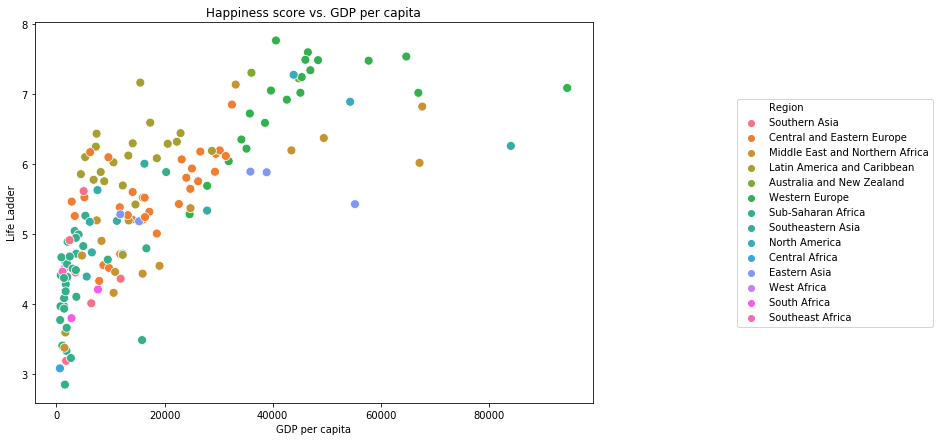

In [24]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'GDP per capita', y = 'Life Ladder', hue = 'Region', s = 80, data = df_region)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. GDP per capita');

Some of the happiest regions, such as Western Europe, do have high GDP. But some Latin America and Caribbean countries with GDP lower than 20k also seem to be happier than those with similar GDP. 

## Happiness & Healthy life expectancy at birth

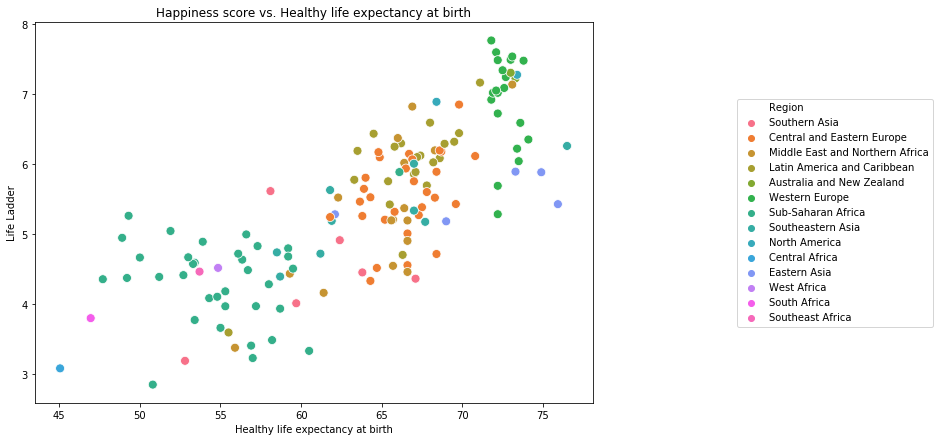

In [25]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Healthy life expectancy at birth', y = 'Life Ladder', hue = 'Region', s = 80, data = df_region)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Healthy life expectancy at birth');

As expected, the higher Healthy life expectancy at birth, the happier.

## Happiness & Social Support

### Are people happier when they family members or friends to count on?

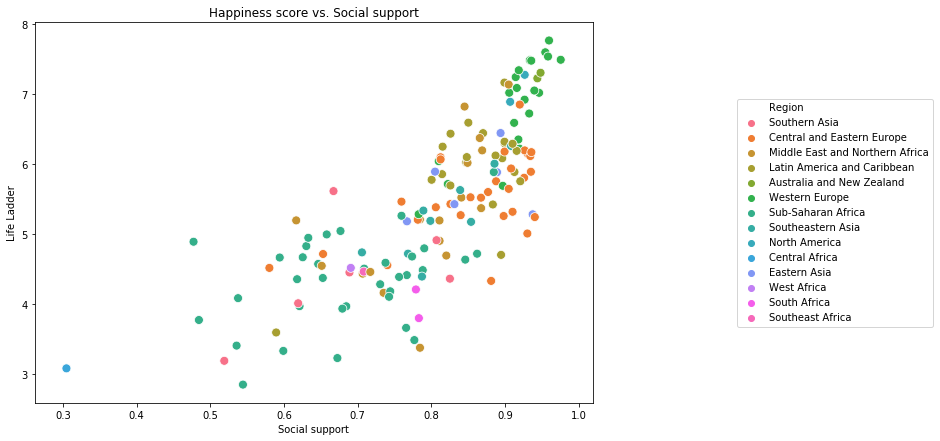

In [26]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Social support', y = 'Life Ladder', hue = 'Region', s = 80, data = df_region)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Social support');

Happier regions have higher social support. That is, people who are supported by families and friends are happier.

## Happiness & Freedom to make life choices	

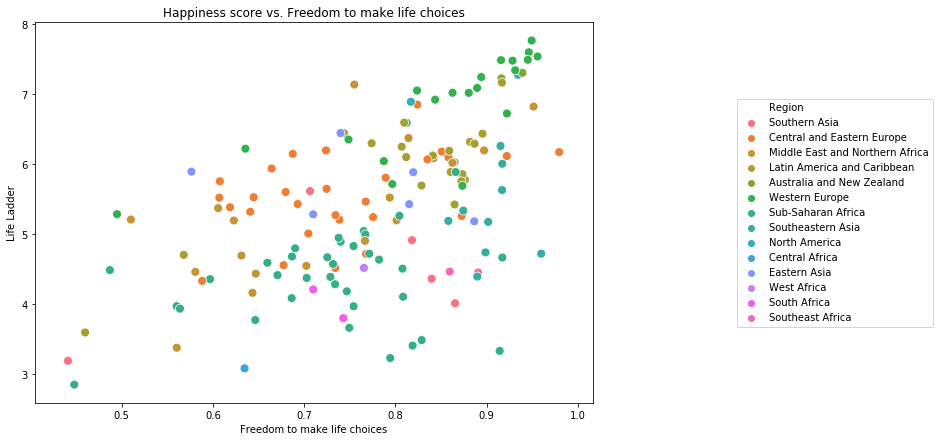

In [27]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Freedom to make life choices', y = 'Life Ladder', hue = 'Region', s = 80, data = df_region)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Freedom to make life choices');

Happier countries appear to have more freedom to choose what they do with their lives.

## Happiness & Perceptions of corruption

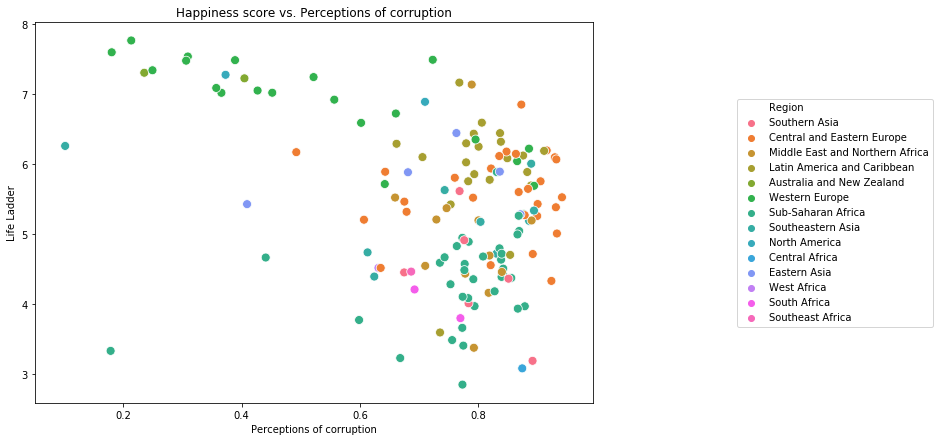

In [28]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Perceptions of corruption', y = 'Life Ladder', hue = 'Region', s = 80, data = df_region)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Perceptions of corruption');

As expected, happier countries have lower perceptions of corruption.

## Happiness & Generosity

Let's now take a look at the relationship between Happiness scores and Helping/Giving to others. We'll focus on two aspects of Giving to others:
1. Giving Money -Donating money to charity.
2. Giving Time -Volunteering.


We'll use another survey data by Gallup World Poll (2009-2017; N=1,073,711). The data was generated while controlling for several important covariates, such as age, household income, gender, food security, education, and marital status. The data shows the percentage of respondents within each country who reported donating to charity or volunteering within the last month.

	

The columns of the data are: 
- **Country**: Name of the country
- **Percentage Donating to Charity**: Percentage of respondents within the country who reported Donating Money to a Charity in the Past Month.
- **Percentage Volunteering**: 	Percentage of respondents within the country who reported Volunteering Time to an Organization in the Past Month.

In [29]:
df_generosity = pd.read_excel('data/generosity.xls')
df_generosity.head()

Country  Percentage Donating to Charity  Percentage Volunteering
0  Afghanistan                           0.281                    0.179
1      Albania                           0.188                    0.084
2      Algeria                           0.112                    0.087
3       Angola                           0.136                    0.168
4    Argentina                           0.190                    0.164

To determine the relationship, let's merge `df_generosity` with `df_region` by country names.

In [30]:
# Both dataframs have the 'Country' column, so we don't need to specify left_on and right_on
df_with_generosity = df_region.merge(df_generosity, how = 'left')
df_with_generosity.head()

Life Ladder  Log GDP per capita  Social support  \
0     3.192063            7.496460        0.519156   
1     4.718351            9.375359        0.653234   
2     5.210951            9.546586        0.784664   
3     6.086449            9.829590        0.896477   
4     4.558552            9.070406        0.740531   

   Healthy life expectancy at birth  Freedom to make life choices  \
0                         52.799999                      0.441038   
1                         68.399999                      0.767881   
2                         65.699999                      0.510026   
3                         68.600001                      0.841854   
4                         66.600001                      0.677443   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.891748         0.495142         0.374854   
1                   0.892112         0.685928         0.324862   
2                   0.729239         0.631178         0.319589   
3                   0.849077         0.823880         0.307955   
4                   0.820977         0.600034         0.443072   

   Confidence in national government  Democratic Quality      Country  \
0                           0.316945           -1.870996  Afghanistan   
1                           0.431328            0.278618      Albania   
2                                NaN           -0.952172      Algeria   
3                           0.328781            0.349943    Argentina   
4                           0.367481           -0.626963      Armenia   

                            Region  GDP per capita  \
0                    Southern Asia     1801.653762   
1       Central and Eastern Europe    11794.149701   
2  Middle East and Northern Africa    13996.823903   
3      Latin America and Caribbean    18575.327968   
4       Central and Eastern Europe     8694.149804   

   Percentage Donating to Charity  Percentage Volunteering  
0                           0.281                    0.179  
1                           0.188                    0.084  
2                           0.112                    0.087  
3                           0.190                    0.164  
4                           0.093                    0.079

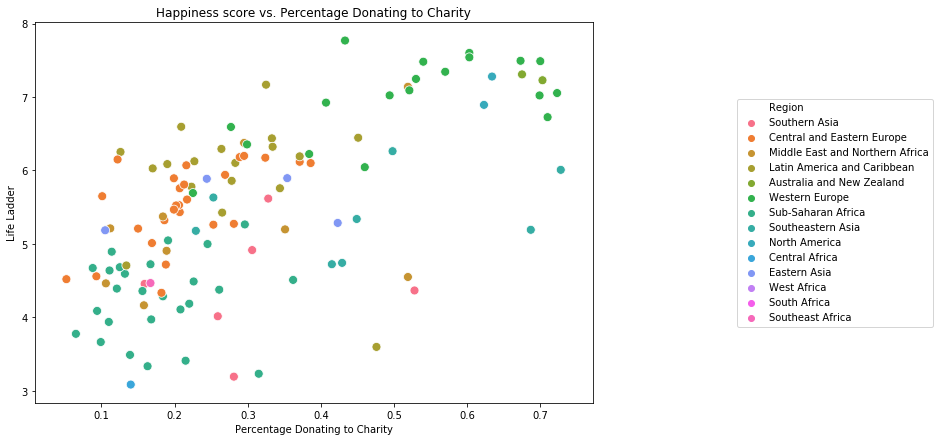

In [31]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Percentage Donating to Charity', y = 'Life Ladder', hue = 'Region', s = 80, data = df_with_generosity)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Percentage Donating to Charity');

People from happier regions tend to donate  money to charities more.

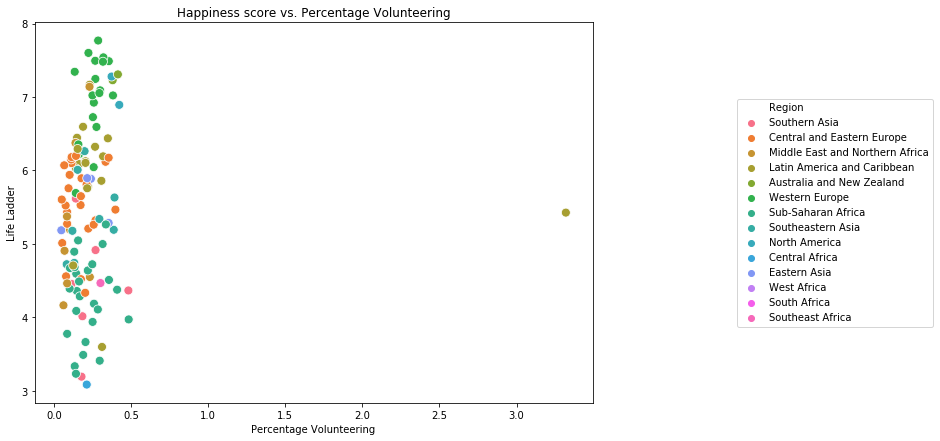

In [32]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Percentage Volunteering', y = 'Life Ladder', hue = 'Region', s = 80, data = df_with_generosity)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Percentage Volunteering');

Looking at the graph above, there's clearly an outlier, since percentage is always between 0(0%) and 1(100%).
Since I manully scripted the data from images, there's likely an error when extracting the data. Let's double check the abnormal entry with the original image.

In [33]:
# Find out which entry appears to be mistaken
df_with_generosity[df_with_generosity['Percentage Volunteering'] > 1.0]

Life Ladder  Log GDP per capita  Social support  \
36     5.425706            9.590399        0.883703   

    Healthy life expectancy at birth  Freedom to make life choices  \
36                              65.5                      0.864904   

    Perceptions of corruption  Positive affect  Negative affect  \
36                   0.753315          0.74792         0.281415   

    Confidence in national government  Democratic Quality             Country  \
36                           0.477032            0.187613  Dominican Republic   

                         Region  GDP per capita  \
36  Latin America and Caribbean    14623.700134   

    Percentage Donating to Charity  Percentage Volunteering  
36                           0.265                     3.32

<a href="https://ibb.co/HBLWH5v"><img src="https://i.ibb.co/vVC7j05/4-1-A-table.png" alt="4-1-A-table" border="0"></a>

It appears that the correct number is 33.2% instead of 332%. Let's revise that.

In [34]:
df_with_generosity.iloc[36,-1] = 0.332

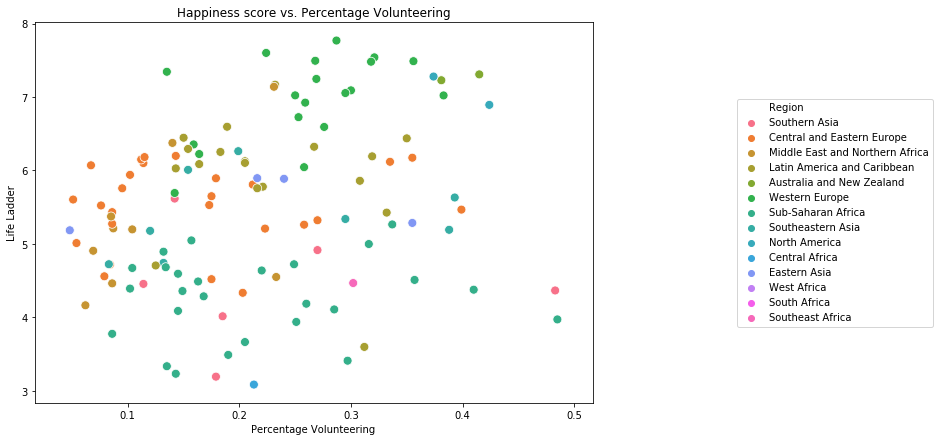

In [35]:
# Now let's graph Happiness score vs. Percentage Volunteering again
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Percentage Volunteering', y = 'Life Ladder', hue = 'Region', s = 80, data = df_with_generosity)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Percentage Volunteering');

Much better!

Based on our data, we can't conclude clear relationship between Happiness and Volunteering.

Intersting fact:

Behaving generously can increase happiness—but this effect is not inevitable. Instead, research has identified several key ingredients that seem to be important for turning good deeds into good feelings. Specifically, people are more likely to derive joy from helping others when:

- they feel free to choose whether or how to help.

- they feel connected to the people they are helping.

- they can see how their help is making a difference.

reference: [World Happiness Report 2019 Chapter 4](https://worldhappiness.report/ed/2019/happiness-and-prosocial-behavior-an-evaluation-of-the-evidence/)

## Happiness & Alcohol Consumption

Just for fun, let's take a look at the dataset of Happiness vs. Alcohol Consumption. The data were taken in 2016 and include the following columns:

- **Country**: Name of the country
- **Region**: Region the country belongs to
- **Hemisphere**: Hemisphere of country
- **HappinessScore**: Same as 'Life Ladder' in previous dataframs with 'Year'=2016
- **HDI**: Human Development Index by United Nations Development Programme
- **GDP_PerCapita** Gross Domestic Product index
- **Beer_PerCapita**: Liters ( per capita ) of beer consumption
- **Spirit_PerCapita**: Consumption of spirits drink ( per capita )
- **Wine_PerCapita**: Wine consumption

In [36]:
df_alcohol = pd.read_csv('data/HappinessAlcoholConsumption.csv')

In [37]:
df_alcohol.head()

Country          Region Hemisphere  HappinessScore  HDI  GDP_PerCapita  \
0      Denmark  Western Europe      north           7.526  928         53.579   
1  Switzerland  Western Europe      north           7.509  943         79.866   
2      Iceland  Western Europe      north           7.501  933         60.530   
3       Norway  Western Europe      north           7.498  951         70.890   
4      Finland  Western Europe      north           7.413  918         43.433   

   Beer_PerCapita  Spirit_PerCapita  Wine_PerCapita  
0             224                81             278  
1             185               100             280  
2             233                61              78  
3             169                71             129  
4             263               133              97

### Happiness & Beer Consumption

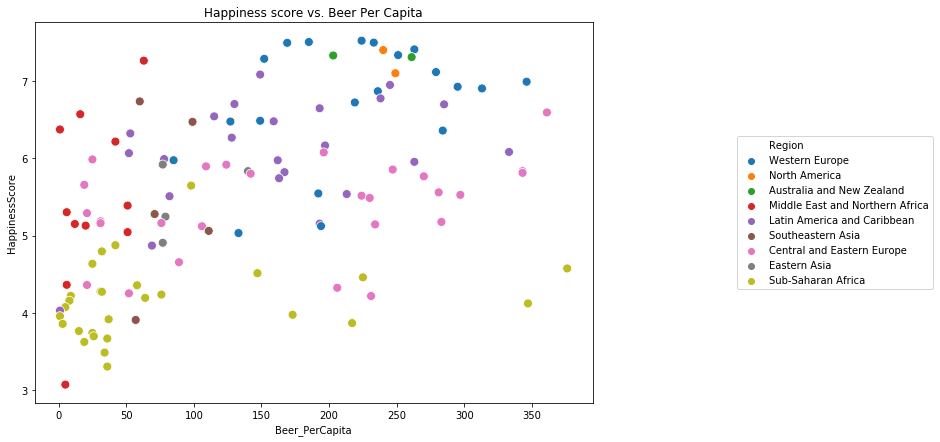

In [38]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Beer_PerCapita', y = 'HappinessScore', hue = 'Region', s = 80, data = df_alcohol)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Beer Per Capita');

Some happier countries do seem to consume more beers, but some consume less. There's no clear relationship between bear consumption and happiness.

### Happiness & Wine Consumption

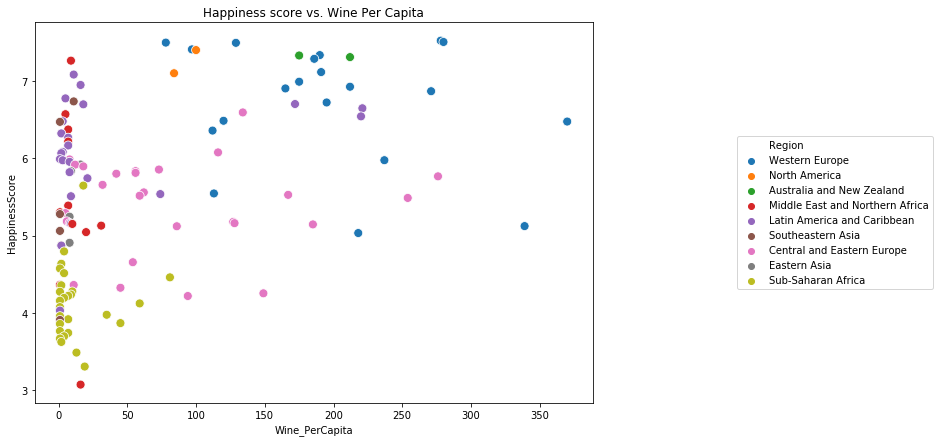

In [39]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Wine_PerCapita', y = 'HappinessScore', hue = 'Region', s = 80, data = df_alcohol)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Wine Per Capita');

Unlike beers, where each country somewhat has consumption no matter happy or not, a lot of countries don't consume wines at all. Perhaps wines are not popular in some regions, such as Middle East and Northern Africa, or hard to get access to. Again, there's no clear relationship between wine consumption and happiness.

### Happiness & Spirit Consumption

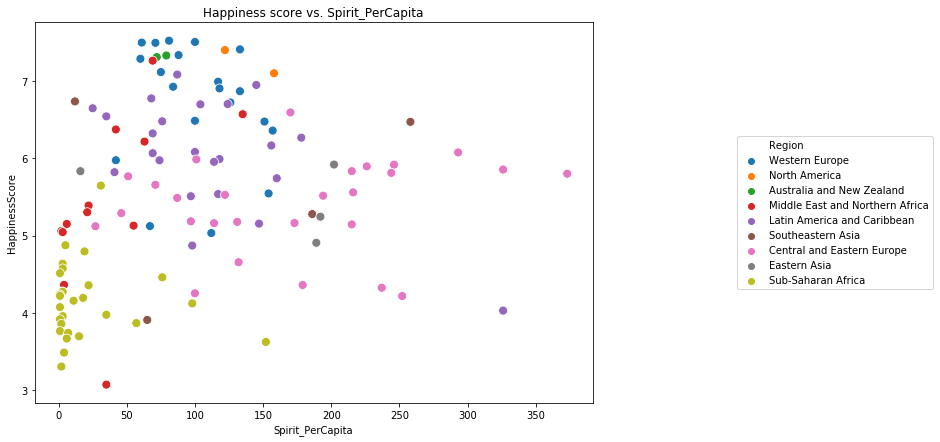

In [40]:
plt.figure(figsize = [10, 7])
g = sns.scatterplot(x = 'Spirit_PerCapita', y = 'HappinessScore', hue = 'Region', s = 80, data = df_alcohol)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Happiness score vs. Spirit_PerCapita');

This one is just for fun. Some countries with lower Happiness scores, such as those in Sub-Saharan Africa, consume little to none spirits, probably because they are poor. While some mediocrely happy countries consume a lot of spirits.

# 3. Predicting Happiness Scores Using Nearest-Neighbors

The idea of Nearest Neighbor predictor is to predict the target value using the 'closest' data points. The closeness is not always measured by Euclidean distance, you can define the distance metrics in your own way based on problems. We'll be using **geographical distance** and **similarity in GDP** today.

To get the geographical location for each country, we'll be using their latitudes and longitudes from https://developers.google.com/public-data/docs/canonical/countries_csv. The data is scraped and saved as 'data/country_lat_long.xlsx'.

In [41]:
country_lat_long = pd.read_excel('data/country_lat_long.xlsx')
country_lat_long.head()

latitude  longitude                  name
0  42.546245   1.601554               Andorra
1  23.424076  53.847818  United Arab Emirates
2  33.939110  67.709953           Afghanistan
3  17.060816 -61.796428   Antigua and Barbuda
4  18.220554 -63.068615              Anguilla

Let's merge `country_lat_long` with `df_region` by country names, and for this section, we only care about GDP per Capita, Latitudes, Longitudes, and Happiness scores columns.

In [42]:
df_knn = df_region.merge(country_lat_long, left_on = 'Country', right_on = 'name')[['Country', 'GDP per capita','latitude','longitude', 'Life Ladder']]
df_knn.head()

Country  GDP per capita   latitude  longitude  Life Ladder
0  Afghanistan     1801.653762  33.939110  67.709953     3.192063
1      Albania    11794.149701  41.153332  20.168331     4.718351
2      Algeria    13996.823903  28.033886   1.659626     5.210951
3    Argentina    18575.327968 -38.416097 -63.616672     6.086449
4      Armenia     8694.149804  40.069099  45.038189     4.558552

### Let's first define our metrics

#### Geographical Distance

To make the geographical calculations easier, we'll use the `python` package `geopy`. 

First, we need to install the package. You can either run the following code in this jupyter notebook, or run `pip install geopy` in your terminal.

In [43]:
!pip install geopy

Let's import the module and define a function that computes the geodesic distance with latitudes and longitudes in miles. 
- Read more about geodesic distance: https://quora.com/What-is-geodesic-distance

In [44]:
from geopy.distance import geodesic 

def distance(lat_1, long_1, lat_2, long_2):
    return geodesic((lat_1, long_1), (lat_2, long_2)).miles

In [45]:
# Compute the distance between the U.S. and China
distance(37.09024, -95.712891, 35.86166, 104.195397)

7252.130483481543

#### GDP difference

To measure the difference in GDP between two countries, we'll simply use the absolute difference.

### Models

Before building the models, let's work through the steps of the K-Nearest Neighbor Algorithm.
1. Initialize K to your chosen number of neighbors
2. For each country you want to predict, calculate the distances and store them in a list
3. Sort the list of distances in ascending order
4. Find the closest K countries by picking the first K entries from the sorted list and find their Happiness scores
6. Return the mean of the K Happiness scores

#### Geographical Distance

In [46]:
def get_neighbors_distance(true, predict, num_neighbors):
    distances = []
    for i in range(len(true)):
        t = true.iloc[i,:]
        dist = distance(t['latitude'], t['longitude'], predict['latitude'], predict['longitude'])
        distances.append((t['Country'], dist))
    distances.sort(key=lambda x: x[1])
    neighbors = []
    for j in range(num_neighbors):
        neighbors.append(distances[j][0])
    scores = [true[true.Country == country]['Life Ladder'].values[0] for country in neighbors]
    return neighbors, np.mean(scores)

Let's predict the United States Happiness ranking using 5 closest countries:

In [59]:
# Find the index of the U.S.
idx = df_knn[df_knn.Country == 'United States'].index[0]

closest_countries, pred_score = get_neighbors_distance(df_knn, df_knn.iloc[idx, :], 5)
print('The 5 closest countries: ', closest_countries)
print('Predicted Happiness score for the U.S.: ', pred_score)
print('Acutual Happiness score for the U.S.: ', df_knn.loc[idx, 'Life Ladder'])
print('Prediction Error: ', abs(pred_score - df_knn.loc[idx, 'Life Ladder']))

The 5 closest countries:  ['United States', 'Mexico', 'Canada', 'Guatemala', 'Honduras']
Predicted Happiness score for the U.S.:  6.612299760182699
Acutual Happiness score for the U.S.:  6.892681280771892
Prediction Error:  0.2803815205891924


Not so bad! Now let's try predicting Italy's Happiness ranking.

In [60]:
idx = df_knn[df_knn.Country == 'Italy'].index[0]
closest_countries, pred_score = get_neighbors_distance(df_knn, df_knn.iloc[idx, :], 5)
print('The 5 closest countries: ', closest_countries)
print('Predicted Happiness score for Italy: ', pred_score)
print('Acutual Happiness score for Italy: ', df_knn.loc[idx, 'Life Ladder'])
print('Prediction Error: ', abs(pred_score - df_knn.loc[idx, 'Life Ladder']))

The 5 closest countries:  ['Italy', 'Croatia', 'Bosnia and Herzegovina', 'Slovenia', 'Montenegro']
Predicted Happiness score for Italy:  5.736435667673746
Acutual Happiness score for Italy:  6.223306973775228
Prediction Error:  0.48687130610148177


This time KNN didn't perform as well. Perhaps geographical distance isn't the best predictor.

#### GDP per Capita

In [49]:
def get_neighbors_gdp(true, predict, num_neighbors):
    distances = []
    for i in range(len(true)):
        t = true.iloc[i,:]
        dist = abs(t['GDP per capita'] - predict['GDP per capita'])
        distances.append((t['Country'], dist))
    distances.sort(key=lambda x: x[1])
    neighbors = []
    for j in range(num_neighbors):
        neighbors.append(distances[j][0])
    scores = [true[true.Country == country]['Life Ladder'].values[0] for country in neighbors]
    return neighbors, np.mean(scores)

Let's again predict Happiness socres for the U.S. and Italy using 5 closest countries:

In [61]:
idx = df_knn[df_knn.Country == 'United States'].index[0]
closest_countries, pred_score = get_neighbors_gdp(df_knn, df_knn.iloc[idx, :], 5)
print('The 5 closest countries: ', closest_countries)
print('Predicted Happiness score for the U.S.: ', pred_score)
print('Acutual Happiness score for the U.S.: ', df_knn.loc[idx, 'Life Ladder'])
print('Prediction Error: ', abs(pred_score - df_knn.loc[idx, 'Life Ladder']))

The 5 closest countries:  ['United States', 'Switzerland', 'Saudi Arabia', 'Netherlands', 'Sweden']
Predicted Happiness score for the U.S.:  7.115774790445964
Acutual Happiness score for the U.S.:  6.892681280771892
Prediction Error:  0.22309350967407227


In [62]:
idx = df_knn[df_knn.Country == 'Italy'].index[0]
closest_countries, pred_score = get_neighbors_gdp(df_knn, df_knn.iloc[idx, :], 5)
print('The 5 closest countries: ', closest_countries)
print('Predicted Happiness score for Italy: ', pred_score)
print('Acutual Happiness score for Italy: ', df_knn.loc[idx, 'Life Ladder'])
print('Prediction Error: ', abs(pred_score - df_knn.loc[idx, 'Life Ladder']))

The 5 closest countries:  ['Italy', 'Malta', 'South Korea', 'New Zealand', 'Spain']
Predicted Happiness score for Italy:  6.5010757128397625
Acutual Happiness score for Italy:  6.223306973775228
Prediction Error:  0.2777687390645349


Looks like GDP per Capita performs better on both the U.S. and Italy.

Now, let's find out the overall performace for the two models, we'll use the [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error) as our metric: $$MAE = \frac{1}{n}\sum_{i=1}^n |pred - true|$$

In [52]:
distance_errors = []
gdp_errors = []
for i in range(len(df_knn)):
    closest_countries, dist_score = get_neighbors_distance(df_knn, df_knn.iloc[i, :], 5)
    closest_countries, gdp_score = get_neighbors_gdp(df_knn, df_knn.iloc[i, :], 5)
    true = df_knn.loc[i, 'Life Ladder']
    distance_errors.append(abs(dist_score - true))
    gdp_errors.append(abs(gdp_score - true))

In [65]:
print('MAE for geographical distance model: ', np.mean(distance_errors))
print('MAE for GDP model: ', np.mean(gdp_errors))

MAE for geographical distance model:  0.42566970713712554
MAE for GDP model:  0.44130066224822284


The distance model has a lower overall Error rate.

There are multiple ways to improve the model performance, such as tuning the $k$ values. Try some different $k$s and see what you find. What happens when $k=1$?